In [1]:
# gerekli kütüphane aktarımları
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel('/kaggle/input/yantlar/Universite Ogrencilerinin Gelecek Beklentileri ve Yasam Memnuniyetleri Iliskisi (Yantlar).xlsx')
df.head()

,Yaş,Cinsiyet,Bölüm,Not_Ortalaması,Aile_Geliri,İlişki_Durumu,Gelecek_Beklentileri,Çalışma_Durumu,Etkinliklere_Katılım,İdeal,...,Gelecek_Yaşam,Gelecekte_Hedefleri,Gelecek_Mutluluk,Hedefler,İyi_İş,İdeal_Yaşam_Yakınlık,İyi_Koşullar,Memnuniyet,İstekler,Değişim
0,18-24,Kadın,Bilgisayar Mühendisliği,3.00 - 3.50,20000 - 50000,İlişkisi var,8,Yarı zamanlı,4,3,...,4,4,4,4,4,4,4,4,4,2
1,18-24,Erkek,Kontrol ve Otomasyon Mühendisliği,3.00 - 3.50,10000 - 20000,İlişkisi var,6,Stajyer,4,1,...,4,3,3,3,3,4,3,4,3,2
2,18-24,Erkek,Bilgisayar Mühendisliği,3.00 - 3.50,5000 - 10000,İlişkisi var,7,Çalışmıyor,1,1,...,3,4,4,4,4,3,5,5,3,2
3,18-24,Kadın,Bilgisayar Mühendisliği,3.00 - 3.50,20000 - 50000,İlişkisi var,4,Çalışmıyor,5,3,...,4,2,3,2,2,2,3,3,4,1
4,18-24,Kadın,Endüstri Mühendisliği,3.50 - 4.00,5000 - 10000,İlişkisi yok,3,Çalışmıyor,4,2,...,3,3,3,3,3,2,3,3,2,2


# Verileri Düzenleme

In [3]:
# aynı olan sütunlar çıkartıldı
df = df.drop(['İdeal', 'Yaşam_Koşulları'], axis=1)

In [4]:
# bölüm adlarından boşluklar kaldırılıp küçük harfe çevrildi
def bolum_temizle(name):
    name = name.strip() 
    name = name.lower() 
    return name

In [5]:
# temizleme fonksiyonu çağırıldı
df["Bölüm"] = df["Bölüm"].apply(bolum_temizle)

In [6]:
# mimarlık ve psikoloji manuel düzeltildi
df['Bölüm'].replace({
    'mimarlik': 'mimarlık',
    'psikiloji': 'psikoloji'
}, inplace=True)

In [7]:
df.head()

,Yaş,Cinsiyet,Bölüm,Not_Ortalaması,Aile_Geliri,İlişki_Durumu,Gelecek_Beklentileri,Çalışma_Durumu,Etkinliklere_Katılım,Ekonomik_Durum_G,...,Gelecek_Yaşam,Gelecekte_Hedefleri,Gelecek_Mutluluk,Hedefler,İyi_İş,İdeal_Yaşam_Yakınlık,İyi_Koşullar,Memnuniyet,İstekler,Değişim
0,18-24,Kadın,bilgisayar mühendisliği,3.00 - 3.50,20000 - 50000,İlişkisi var,8,Yarı zamanlı,4,5,...,4,4,4,4,4,4,4,4,4,2
1,18-24,Erkek,kontrol ve otomasyon mühendisliği,3.00 - 3.50,10000 - 20000,İlişkisi var,6,Stajyer,4,4,...,4,3,3,3,3,4,3,4,3,2
2,18-24,Erkek,bilgisayar mühendisliği,3.00 - 3.50,5000 - 10000,İlişkisi var,7,Çalışmıyor,1,5,...,3,4,4,4,4,3,5,5,3,2
3,18-24,Kadın,bilgisayar mühendisliği,3.00 - 3.50,20000 - 50000,İlişkisi var,4,Çalışmıyor,5,4,...,4,2,3,2,2,2,3,3,4,1
4,18-24,Kadın,endüstri mühendisliği,3.50 - 4.00,5000 - 10000,İlişkisi yok,3,Çalışmıyor,4,3,...,3,3,3,3,3,2,3,3,2,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Yaş                   116 non-null    object
 1   Cinsiyet              116 non-null    object
 2   Bölüm                 116 non-null    object
 3   Not_Ortalaması        116 non-null    object
 4   Aile_Geliri           116 non-null    object
 5   İlişki_Durumu         116 non-null    object
 6   Gelecek_Beklentileri  116 non-null    int64 
 7   Çalışma_Durumu        116 non-null    object
 8   Etkinliklere_Katılım  116 non-null    int64 
 9   Ekonomik_Durum_G      116 non-null    int64 
 10  İş_G                  116 non-null    int64 
 11  İş_Bulma              116 non-null    int64 
 12  Eğitim                116 non-null    int64 
 13  İş_Başarı             116 non-null    int64 
 14  Yaşanılan_Yer         116 non-null    int64 
 15  Arkadaşlar            116 non-null    in

In [9]:
df.describe()

,Gelecek_Beklentileri,Etkinliklere_Katılım,Ekonomik_Durum_G,İş_G,İş_Bulma,Eğitim,İş_Başarı,Yaşanılan_Yer,Arkadaşlar,Aile,...,Gelecek_Yaşam,Gelecekte_Hedefleri,Gelecek_Mutluluk,Hedefler,İyi_İş,İdeal_Yaşam_Yakınlık,İyi_Koşullar,Memnuniyet,İstekler,Değişim
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.00000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,6.646552,2.870690,3.620690,3.508621,2.387931,3.12931,3.043103,3.232759,4.172414,4.362069,...,3.534483,3.637931,3.750000,3.672414,3.741379,3.068966,3.482759,3.431034,3.137931,2.560345
std,2.106942,1.268551,1.154614,1.183184,1.221343,1.14611,1.145063,1.232585,0.916286,0.806458,...,0.945755,0.990358,1.003256,0.958040,0.952075,1.155133,1.058980,1.048594,1.086651,1.273740
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,2.000000,3.000000,3.000000,1.000000,2.00000,2.000000,2.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000
50%,7.000000,3.000000,4.000000,4.000000,2.000000,3.00000,3.000000,4.000000,4.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,2.000000
75%,8.000000,4.000000,4.000000,4.000000,3.000000,4.00000,4.000000,4.000000,5.000000,5.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
df.columns

Index(['Yaş', 'Cinsiyet', 'Bölüm', 'Not_Ortalaması ', 'Aile_Geliri',
       'İlişki_Durumu', 'Gelecek_Beklentileri', 'Çalışma_Durumu ',
       'Etkinliklere_Katılım', 'Ekonomik_Durum_G', 'İş_G', 'İş_Bulma',
       'Eğitim', 'İş_Başarı', 'Yaşanılan_Yer', 'Arkadaşlar', 'Aile',
       'Harcama_Kısıtlaması', 'Gelecek_Yaşam', ' Gelecekte_Hedefleri',
       'Gelecek_Mutluluk', 'Hedefler', 'İyi_İş', 'İdeal_Yaşam_Yakınlık',
       'İyi_Koşullar', 'Memnuniyet', 'İstekler', 'Değişim'],
      dtype='object')

In [11]:
# iş bulma ve harcama kısıtlaması negatif anlamda olduğu için 5'ten çıkartılarak pozitif anlama dönüştürüldü
df['İş_Bulma'] = 5 - df['İş_Bulma']
df['Harcama_Kısıtlaması'] = 5 - df['Harcama_Kısıtlaması']
print(df[['İş_Bulma', 'Harcama_Kısıtlaması']])

     İş_Bulma  Harcama_Kısıtlaması
0           3                    0
1           2                    0
2           4                    0
3           3                    2
4           3                    2
..        ...                  ...
111         2                    1
112         1                    0
113         0                    1
114         3                    2
115         0                    1

[116 rows x 2 columns]


In [12]:
# sütun adlarındaki boşluklar düzeltildi
df.rename(columns={' Gelecekte_Hedefleri': 'Gelecekte_Hedefleri'}, inplace=True)
df.rename(columns={'Çalışma_Durumu ': 'Çalışma_Durumu'}, inplace=True)
df.rename(columns={'Not_Ortalaması ': 'Not_Ortalaması'}, inplace=True)

In [13]:
# sorular anlamlarına göre gruplandırıldı
gruplar = {
    'Ekonomi': ['Ekonomik_Durum_G'],
    'İstihdam': ['İş_G', 'İş_Bulma'],
    'Eğitim': ['Eğitim', 'İş_Başarı'],
    'Sosyal Çevre': ['Yaşanılan_Yer', 'Arkadaşlar', 'Aile'],
    'Gelir': ['Harcama_Kısıtlaması'],
    'Beklenti': ['Gelecek_Yaşam', 'Gelecekte_Hedefleri', 'Gelecek_Mutluluk', 'Hedefler', 'İyi_İş'],
    'Yaşam_Memnuniyeti_Ölçeği': ['İdeal_Yaşam_Yakınlık', 'İyi_Koşullar', 'Memnuniyet', 'İstekler', 'Değişim']
}

In [14]:
# standart sapma ve ortalama verileri toplanacak 
istatistik = pd.DataFrame()

In [15]:
# gerekli hesaplamalar yapıldı
for group, columns in gruplar.items():
    istatistik.loc[group, 'std_dev'] = df[columns].stack().std()
    istatistik.loc[group, 'mean'] = df[columns].stack().mean()

In [16]:
# sonuçlar
print(istatistik)

                           std_dev      mean
Ekonomi                   1.154614  3.620690
İstihdam                  1.281157  3.060345
Eğitim                    1.143920  3.086207
Sosyal Çevre              1.114362  3.922414
Gelir                     1.166756  1.172414
Beklenti                  0.969997  3.667241
Yaşam_Memnuniyeti_Ölçeği  1.171215  3.136207


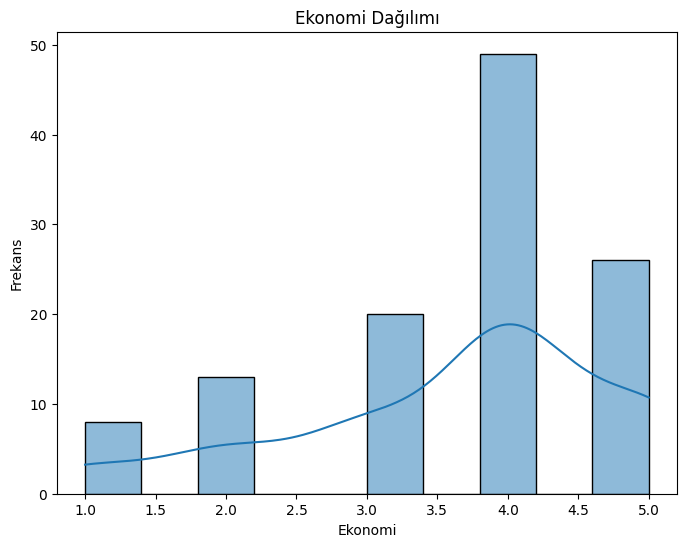

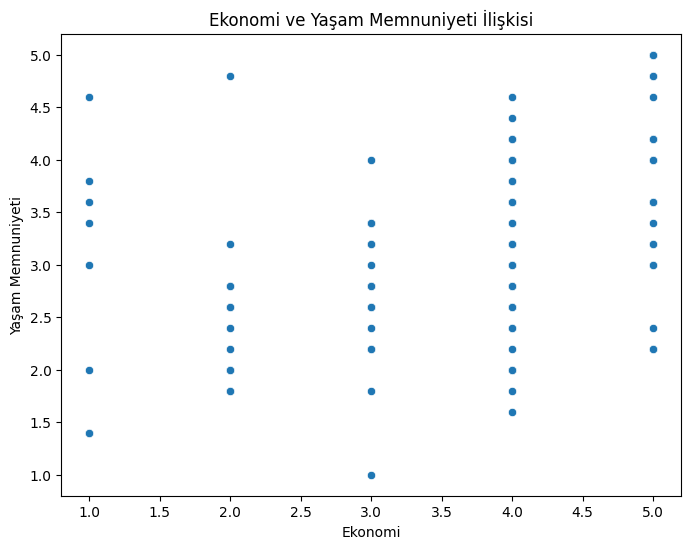

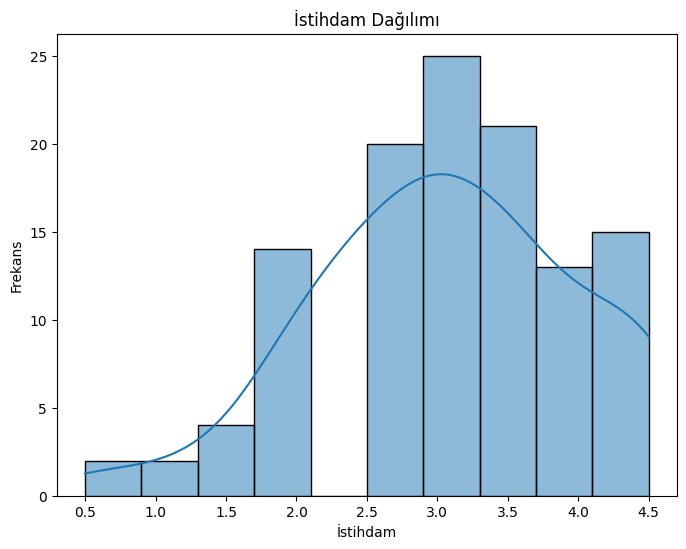

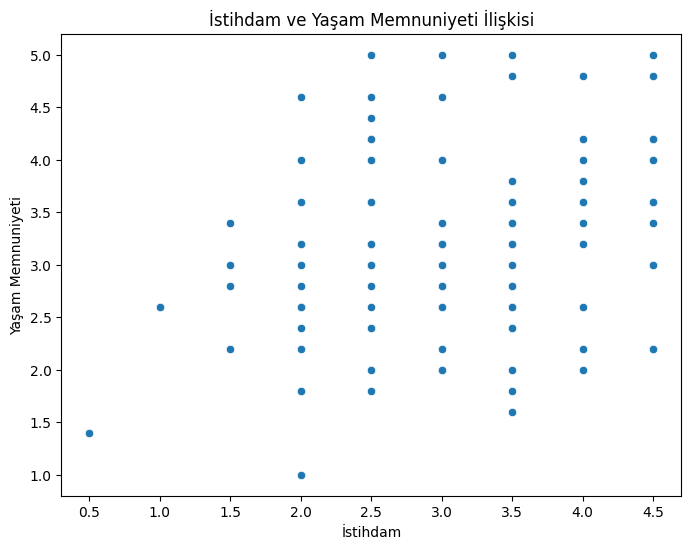

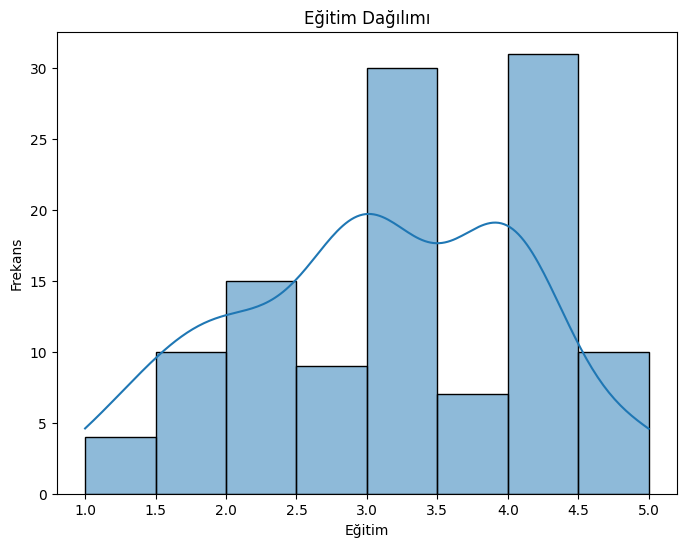

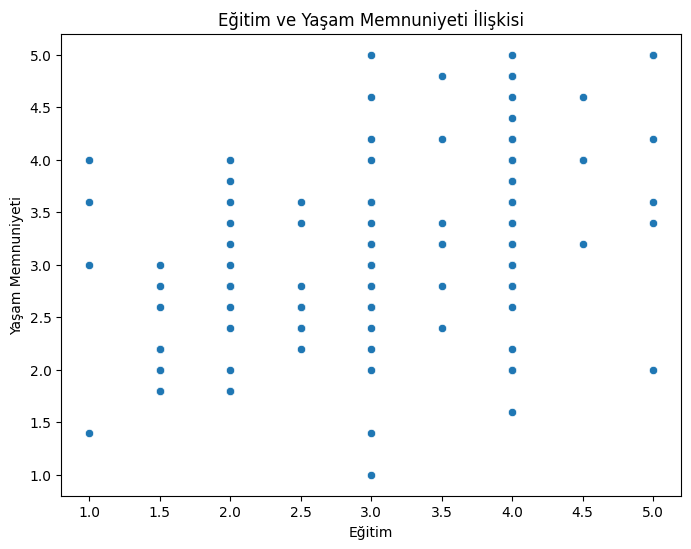

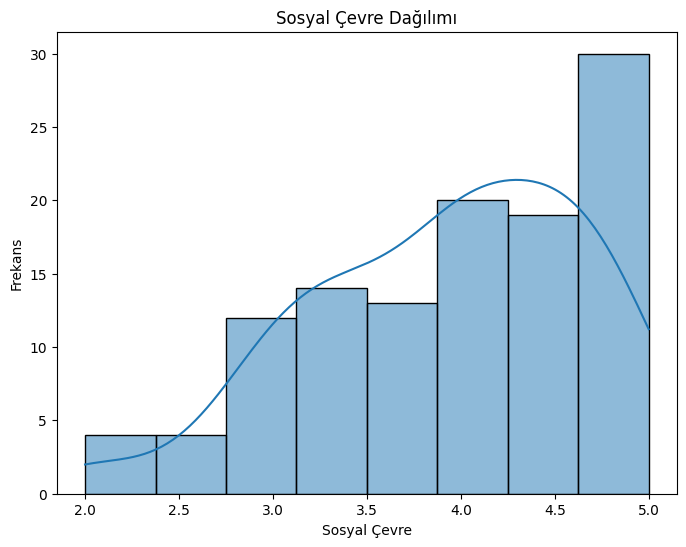

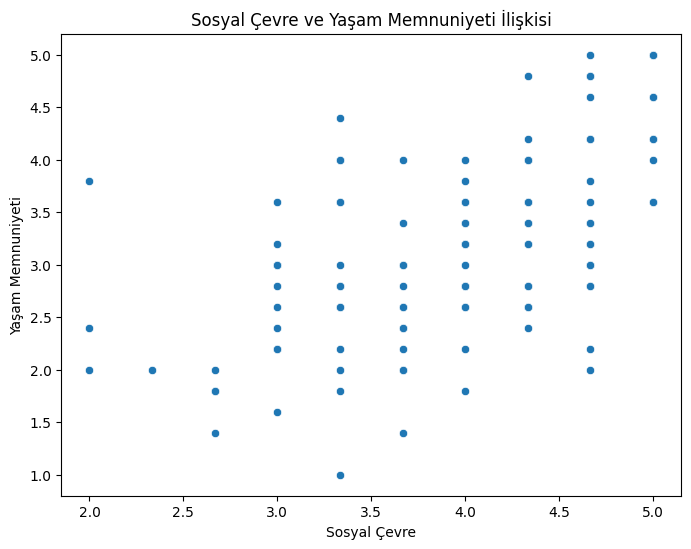

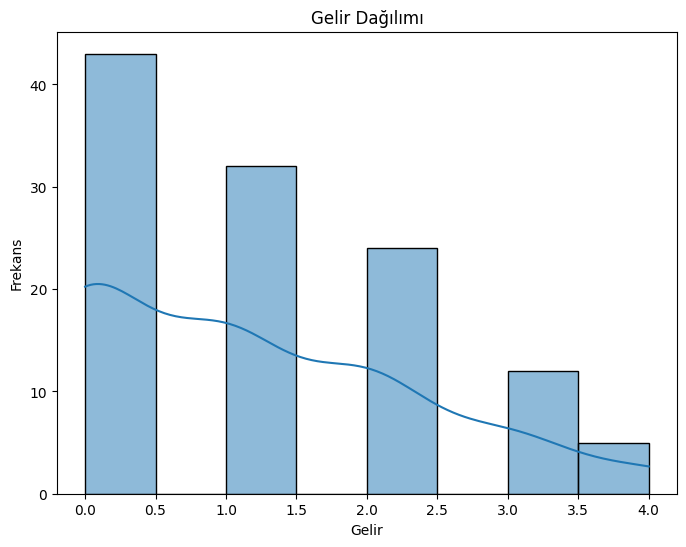

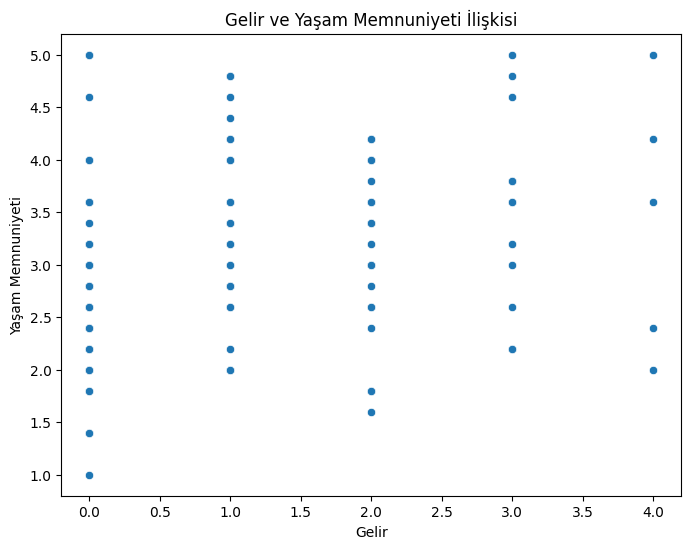

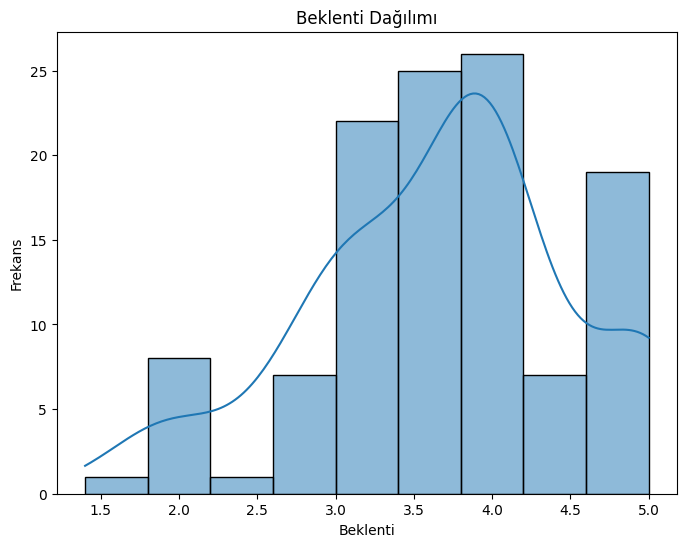

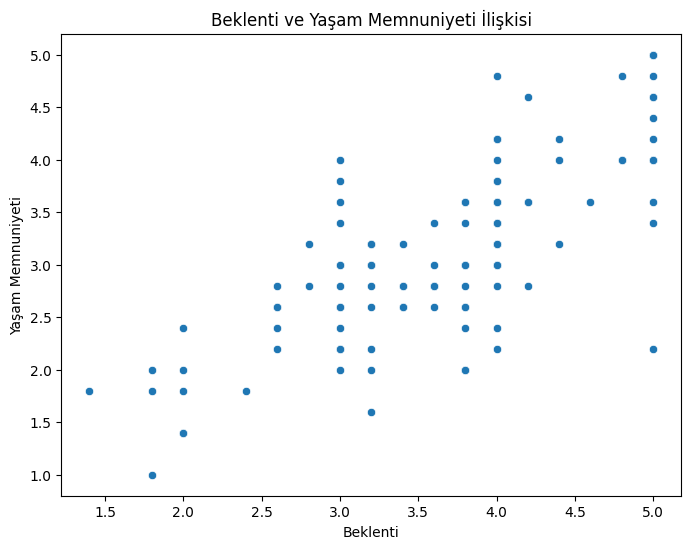

In [17]:
# verilerin birbirleriyle ilişkileri görselleştirildi 
for group, columns in gruplar.items():
    if group == 'Yaşam_Memnuniyeti_Ölçeği':
        continue
    # "Yaşam_Memnuniyeti_Ölçeği"nin standart hesaplaması
    yasam_memnuniyeti_mean = df[gruplar['Yaşam_Memnuniyeti_Ölçeği']].mean(axis=1)

    # her bir grup için histogram çizildi
    plt.figure(figsize=(8, 6))
    sns.histplot(df[columns].mean(axis=1), kde=True)
    plt.title(f'{group} Dağılımı')
    plt.xlabel(group)
    plt.ylabel('Frekans')
    plt.show()
    # her bir grup için "Yaşam_Memnuniyeti_Ölçeği"ne göre scatter plot çizildi
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[columns].mean(axis=1), y=yasam_memnuniyeti_mean)
    plt.title(f'{group} ve Yaşam Memnuniyeti İlişkisi')
    plt.xlabel(group)
    plt.ylabel('Yaşam Memnuniyeti')
    plt.show()

In [18]:
df.head()

,Yaş,Cinsiyet,Bölüm,Not_Ortalaması,Aile_Geliri,İlişki_Durumu,Gelecek_Beklentileri,Çalışma_Durumu,Etkinliklere_Katılım,Ekonomik_Durum_G,...,Gelecek_Yaşam,Gelecekte_Hedefleri,Gelecek_Mutluluk,Hedefler,İyi_İş,İdeal_Yaşam_Yakınlık,İyi_Koşullar,Memnuniyet,İstekler,Değişim
0,18-24,Kadın,bilgisayar mühendisliği,3.00 - 3.50,20000 - 50000,İlişkisi var,8,Yarı zamanlı,4,5,...,4,4,4,4,4,4,4,4,4,2
1,18-24,Erkek,kontrol ve otomasyon mühendisliği,3.00 - 3.50,10000 - 20000,İlişkisi var,6,Stajyer,4,4,...,4,3,3,3,3,4,3,4,3,2
2,18-24,Erkek,bilgisayar mühendisliği,3.00 - 3.50,5000 - 10000,İlişkisi var,7,Çalışmıyor,1,5,...,3,4,4,4,4,3,5,5,3,2
3,18-24,Kadın,bilgisayar mühendisliği,3.00 - 3.50,20000 - 50000,İlişkisi var,4,Çalışmıyor,5,4,...,4,2,3,2,2,2,3,3,4,1
4,18-24,Kadın,endüstri mühendisliği,3.50 - 4.00,5000 - 10000,İlişkisi yok,3,Çalışmıyor,4,3,...,3,3,3,3,3,2,3,3,2,2


# Veriyi Hesaplamaya Hazır Hale Getirme 

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [20]:
# one hot encoding için encoder oluşturuldu
encoder = OneHotEncoder(sparse_output=False)

# kategorik özellikler için one hot encoding uygulandı
categorical_columns = ['Yaş', 'Cinsiyet', 'Bölüm', 'İlişki_Durumu', 'Çalışma_Durumu']
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
df_encoded = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns=categorical_columns)

df.head()

,Not_Ortalaması,Aile_Geliri,Gelecek_Beklentileri,Etkinliklere_Katılım,Ekonomik_Durum_G,İş_G,İş_Bulma,Eğitim,İş_Başarı,Yaşanılan_Yer,...,Bölüm_uluslararası i̇lişkiler,Bölüm_uçak mühendisliği | elektronik ve haberleşme mühendisliği (çap),Bölüm_çevre mühendisliği,İlişki_Durumu_Belirtmek istemiyorum,İlişki_Durumu_İlişkisi var,İlişki_Durumu_İlişkisi yok,Çalışma_Durumu_Stajyer,Çalışma_Durumu_Tam zamanlı,Çalışma_Durumu_Yarı zamanlı,Çalışma_Durumu_Çalışmıyor
0,3.00 - 3.50,20000 - 50000,8,4,5,4,3,3,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,3.00 - 3.50,10000 - 20000,6,4,4,3,2,3,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3.00 - 3.50,5000 - 10000,7,1,5,4,4,4,4,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.00 - 3.50,20000 - 50000,4,5,4,4,3,4,4,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3.50 - 4.00,5000 - 10000,3,4,3,2,3,2,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
# veri incelemesi 
unique_values = df['Aile_Geliri'].unique()
print(unique_values)

['20000 - 50000' '10000 - 20000' '5000 - 10000' '50000+']


In [22]:
# veri incelemesi 
unique_values = df['Not_Ortalaması'].unique()
print(unique_values)

['3.00 - 3.50' '3.50 - 4.00' '2.50 - 3.00' '2.00 - 2.50']


In [23]:
# hesaplama için veriler sayısallaştırıldı
# 'Aile_Geliri' sütunundaki değerleri ortalamalarıyla değiştirme ve floata çevirme 
df['Aile_Geliri'] = df['Aile_Geliri'].replace(['20000 - 50000', '10000 - 20000', '5000 - 10000'], [35000, 15000, 7500])
df['Aile_Geliri'] = df['Aile_Geliri'].replace('50000+', 50000)
df['Aile_Geliri'] = df['Aile_Geliri'].astype(float)

# 'Not_Ortalaması' sütunundaki değerleri ortalamalarıyla değiştirme ve floata çevirme 
df['Not_Ortalaması'] = df['Not_Ortalaması'].replace(['3.00 - 3.50', '3.50 - 4.00', '2.50 - 3.00', '2.00 - 2.50'], [3.25, 3.75, 2.75, 2.25])
df['Not_Ortalaması'] = df['Not_Ortalaması'].astype(float)

print(df[['Not_Ortalaması', 'Aile_Geliri']])

     Not_Ortalaması  Aile_Geliri
0              3.25      35000.0
1              3.25      15000.0
2              3.25       7500.0
3              3.25      35000.0
4              3.75       7500.0
..              ...          ...
111            2.75      35000.0
112            2.25      35000.0
113            3.25      15000.0
114            3.75      15000.0
115            3.25      35000.0

[116 rows x 2 columns]


In [24]:
# eksik verileri doldurma
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = imputer.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns)

In [25]:
# memnuniyet ve özellikler ayrıldı
memnuniyet_kolonları = ["İdeal_Yaşam_Yakınlık", "İyi_Koşullar", "Memnuniyet", "İstekler", "Değişim"]
özellik_kolonları = ["Not_Ortalaması", "Aile_Geliri", "Gelecek_Beklentileri", 
                     "Etkinliklere_Katılım", "Ekonomik_Durum_G", "İş_G", "İş_Bulma", 
                     "Eğitim", "İş_Başarı", "Yaşanılan_Yer", "Arkadaşlar", 
                     "Aile", "Harcama_Kısıtlaması", "Gelecek_Yaşam", 
                     "Gelecekte_Hedefleri", "Gelecek_Mutluluk", "Hedefler", "İyi_İş"]

# one hot encoding sonucunda oluşan kolonlar eklendi
özellik_kolonları.extend(encoder.get_feature_names_out(categorical_columns))

# memnuniyet kolonları birleştirildi
df['Memnuniyet_Genel'] = df[memnuniyet_kolonları].mean(axis=1)

# özellik ve hedef sütunları ayırıldı
X = df[özellik_kolonları]
y = df['Memnuniyet_Genel']

In [26]:
df.head()

,Not_Ortalaması,Aile_Geliri,Gelecek_Beklentileri,Etkinliklere_Katılım,Ekonomik_Durum_G,İş_G,İş_Bulma,Eğitim,İş_Başarı,Yaşanılan_Yer,...,Bölüm_uçak mühendisliği | elektronik ve haberleşme mühendisliği (çap),Bölüm_çevre mühendisliği,İlişki_Durumu_Belirtmek istemiyorum,İlişki_Durumu_İlişkisi var,İlişki_Durumu_İlişkisi yok,Çalışma_Durumu_Stajyer,Çalışma_Durumu_Tam zamanlı,Çalışma_Durumu_Yarı zamanlı,Çalışma_Durumu_Çalışmıyor,Memnuniyet_Genel
0,3.25,35000.0,8.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.6
1,3.25,15000.0,6.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.2
2,3.25,7500.0,7.0,1.0,5.0,4.0,4.0,4.0,4.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.6
3,3.25,35000.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.6
4,3.75,7500.0,3.0,4.0,3.0,2.0,3.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.4


In [27]:
# eğitim ve test setleri ayrıldı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.head()

,Not_Ortalaması,Aile_Geliri,Gelecek_Beklentileri,Etkinliklere_Katılım,Ekonomik_Durum_G,İş_G,İş_Bulma,Eğitim,İş_Başarı,Yaşanılan_Yer,...,Bölüm_uluslararası i̇lişkiler,Bölüm_uçak mühendisliği | elektronik ve haberleşme mühendisliği (çap),Bölüm_çevre mühendisliği,İlişki_Durumu_Belirtmek istemiyorum,İlişki_Durumu_İlişkisi var,İlişki_Durumu_İlişkisi yok,Çalışma_Durumu_Stajyer,Çalışma_Durumu_Tam zamanlı,Çalışma_Durumu_Yarı zamanlı,Çalışma_Durumu_Çalışmıyor
15,3.25,15000.0,8.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68,3.25,35000.0,10.0,1.0,1.0,5.0,4.0,4.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
31,3.25,35000.0,5.0,4.0,4.0,4.0,0.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24,3.25,15000.0,3.0,5.0,1.0,1.0,0.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
55,3.75,35000.0,7.0,2.0,5.0,5.0,4.0,3.0,4.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 15 to 102
Data columns (total 63 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Not_Ortalaması                                                         92 non-null     float64
 1   Aile_Geliri                                                            92 non-null     float64
 2   Gelecek_Beklentileri                                                   92 non-null     float64
 3   Etkinliklere_Katılım                                                   92 non-null     float64
 4   Ekonomik_Durum_G                                                       92 non-null     float64
 5   İş_G                                                                   92 non-null     float64
 6   İş_Bulma                                                               92 non-null     flo

In [30]:
X_test.head()

,Not_Ortalaması,Aile_Geliri,Gelecek_Beklentileri,Etkinliklere_Katılım,Ekonomik_Durum_G,İş_G,İş_Bulma,Eğitim,İş_Başarı,Yaşanılan_Yer,...,Bölüm_uluslararası i̇lişkiler,Bölüm_uçak mühendisliği | elektronik ve haberleşme mühendisliği (çap),Bölüm_çevre mühendisliği,İlişki_Durumu_Belirtmek istemiyorum,İlişki_Durumu_İlişkisi var,İlişki_Durumu_İlişkisi yok,Çalışma_Durumu_Stajyer,Çalışma_Durumu_Tam zamanlı,Çalışma_Durumu_Yarı zamanlı,Çalışma_Durumu_Çalışmıyor
83,2.75,15000.0,7.0,4.0,4.0,4.0,2.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,3.75,7500.0,3.0,4.0,3.0,2.0,3.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
42,3.25,7500.0,3.0,2.0,3.0,1.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
40,2.75,35000.0,10.0,5.0,4.0,5.0,1.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10,2.25,15000.0,6.0,1.0,4.0,3.0,3.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
y_train.head()

15    3.0
68    3.6
31    3.6
24    1.4
55    4.2
Name: Memnuniyet_Genel, dtype: float64

In [32]:
y_test.head()

83    2.8
4     2.4
42    1.0
40    4.0
10    2.0
Name: Memnuniyet_Genel, dtype: float64

# Modellerin Uygulanması

In [33]:
# gerekli kütüphane aktarımları
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [34]:
# modeller
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
svr = SVR()
decision_tree = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor()

# skorları tutmak için df
cv_df = pd.DataFrame()


In [35]:
# linear regression
scores_lr = cross_val_score(linear_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_df['Linear Regression'] = np.sqrt(-scores_lr)

In [36]:
# random forest
scores_rf = cross_val_score(random_forest, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_df['Random Forest'] = np.sqrt(-scores_rf)


In [37]:
# support vector regression
scores_svr = cross_val_score(svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_df['SVR'] = np.sqrt(-scores_svr)


In [38]:
# decision tree
scores_dt = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_df['Decision Tree'] = np.sqrt(-scores_dt)

In [39]:
# k-nearest neighbors
scores_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_df['KNN'] = np.sqrt(-scores_knn)


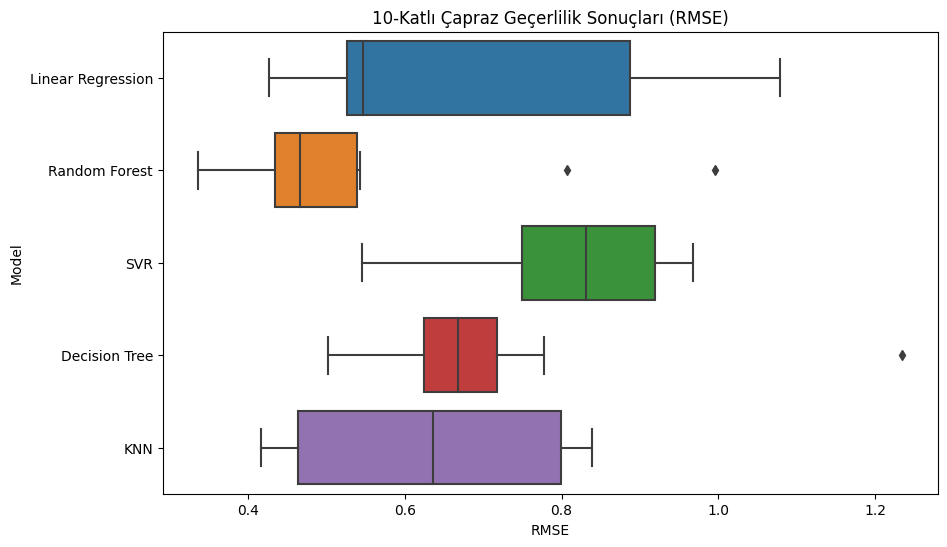

In [40]:
# sonuçları görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_df, orient='h')
plt.title('10-Katlı Çapraz Geçerlilik Sonuçları (RMSE)')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

In [41]:
cv_df.head(10)

,Linear Regression,Random Forest,SVR,Decision Tree,KNN
0,0.526026,0.995616,0.820947,1.234504,0.637119
1,0.552772,0.457487,0.967076,0.501996,0.833787
2,0.981809,0.806985,0.943907,0.777460,0.808730
3,0.652883,0.476218,0.919637,0.646357,0.769415
4,0.541950,0.336475,0.733224,0.705534,0.440807
5,0.499528,0.351668,0.800874,0.618241,0.450185
6,1.078058,0.439200,0.916285,0.666667,0.635540
7,0.426897,0.433177,0.546119,0.721110,0.416547
8,0.965293,0.543288,0.639068,0.669992,0.839259
9,0.529742,0.525222,0.841979,0.577350,0.504733


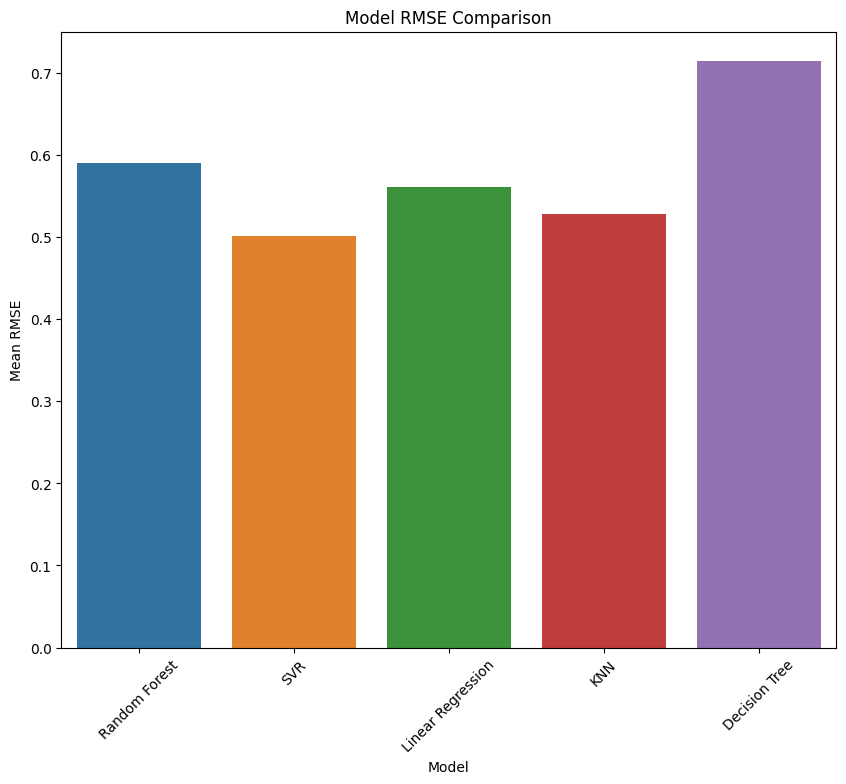

               Model  Mean RMSE   Std Dev
0      Random Forest   0.590423  0.130319
0                SVR   0.500683  0.135922
0  Linear Regression   0.561000  0.108285
0                KNN   0.528380  0.132537
0      Decision Tree   0.714390  0.137848


In [42]:
from sklearn.feature_selection import SelectKBest, f_regression

# modeller
estimators = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# sonuçları saklamak için df
results = pd.DataFrame(columns=['Model', 'Mean RMSE', 'Std Dev'])

# her bir model için özellik seçimi, normalizasyon, PCA ve çapraz geçerlilik uygulandı
for name, estimator in estimators.items():
    selector = SelectKBest(f_regression, k=10)
    pca = PCA(n_components=2)
    scaler = StandardScaler()
    model = make_pipeline(selector, scaler, pca, estimator)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    result = pd.DataFrame({'Model': [name], 'Mean RMSE': [rmse_scores.mean()], 'Std Dev': [rmse_scores.std()]})
    results = pd.concat([results, result])

# sonuçlar görselleştirildi
plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='Mean RMSE', data=results)
plt.title('Model RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('Mean RMSE')
plt.xticks(rotation=45)
plt.show()

print(results)
